15,5/20 aleck103

# Raphael Kaya ; Omar Chaouch

# Algorithmen in der Bioinformatik – Übungsblatt 9
## Abgabe: Freitag, 28.6., 10:30 Uhr

Die Abgabe ist mit bis zu 3 Personen möglich und kann auf Deutsch oder Englisch geschrieben sein. Es muss nur eine Person eines Teams abgeben, in diesem Fall müssen die Namen der Teammitglieder hier in diesem Jupyter Notebook ganz oben genannt werden.

Die praktischen Aufgaben sind mit Python3-Code zu lösen.

Laden Sie das bearbeitete Jupyter Notebook im ILIAS hoch.

**Hinweis:** Sie können eine Bilddatei in ihre Abgabe einbinden, indem Sie test.png durch den entsprechenden Dateinamen ersetzen:

In [1]:
# simple test() function to check function returns vs. what the function was supposed to return.
def test(got, expected):
    if got == expected:
        prefix = ' OK '
    else:
        prefix = '  X '
    print('%s got: %s expected: %s' % (prefix, repr(got), repr(expected)))

## Aufgabe 9.1 (2,5/3 Punkte)

Gegeben sei der Text $T = \mathit{abrakadabra}$. Konstruieren Sie den Suffix-Tree für $T\$$, d. h., hängen Sie ein $\$$-Zeichen an $T$ an und konstruieren Sie für den resultierenden String den Suffix-Tree.

**Rückmeldung:** Da hier der Suffix-Tree für $T\$$ konstruiert werden sollte, fehlt noch der Branch `>ROOT< --$--> ● 12`.

## Aufgabe 9.2 (2/3 Punkte)

Konstruieren Sie den generalisierten Suffix-Tree (und nicht 3 einzelne Suffix-Trees) für die 3 Strings $\mathit{ACTT, TAC, GTA}$.

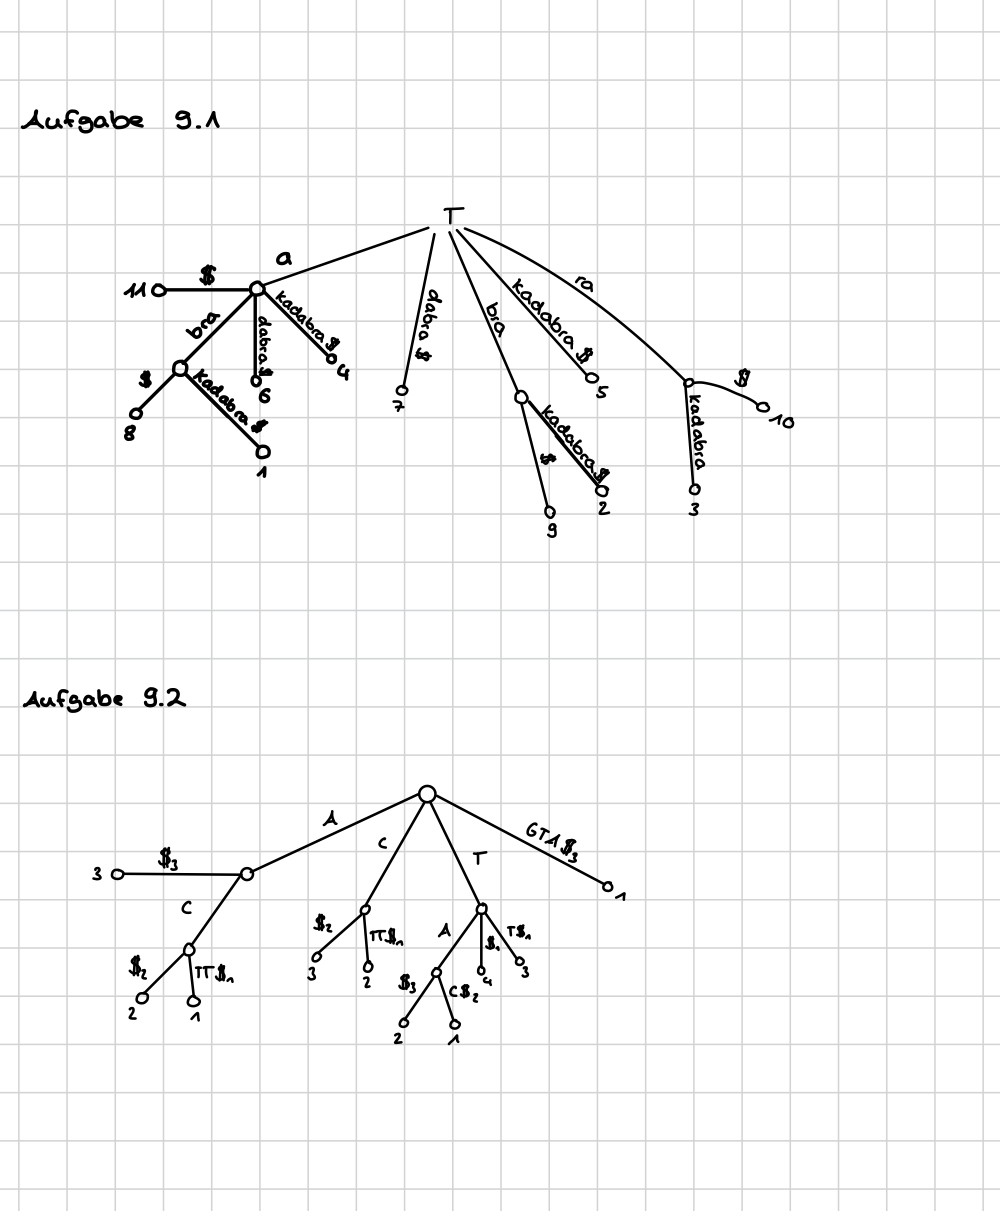

In [2]:
from IPython.display import Image
Image('suffix.jpeg')

**Rückmeldung:** Die Beschriftung der Blätter ist so nicht vollständig (der Index des entsprechenden Strings sollte jeweils mit angegeben werden). Es fehlen die Branches `>ROOT< --$1--> ● 1:5`, `>ROOT< --$2--> ● 2:4` und `>ROOT< --$3--> ● 3:4`.

## Aufgabe 9.3 (4/5 Punkte, 1/1 + 3/4)

Gegeben seien ein Suffix-Tree $S$ (mit dem "$\text{\$}$"-Zeichen) für einen Text $T = t_0 t_1 t_2 \dots t_{m-1}$ sowie ein Muster $P = p_0 p_1 p_2 \dots p_{n-1}$. Gesucht ist ein Matchindex $i$ von $P$ in $T$, also ein beliebiger Index aus der Menge $M = \{i \mid t_i t_{i+1} t_{i+2} \dots t_{i+n-1} = P\}$.

(a) Begründen Sie, warum $M$ nicht in Zeit $\mathcal{O}(|P|)$ gefunden werden kann.

(b) Beschreiben Sie einen Preprocessing-Algorithmus für $S$, sodass ein einzelner Match-Index $i \in M$ für jedes beliebige Muster $P$ nach dem Preprocessing in Zeit $\mathcal{O}(|P|)$ gefunden werden kann. Der Preprocessing-Algorithmus darf den Suffix-Tree von $T$ verändern bzw. zusätzliche Informationen in ihm speichern, aber er besitzt kein Wissen über die Muster $P$, die im Suffix-Tree gesucht werden.

Schätzen Sie außerdem (ohne Begründung) die Laufzeit Ihres Preprocessing-Algorithmus ab. Für die volle Punktzahl wird eine Laufzeit von $\mathcal{O}(|T|)$ erwartet.

Beschreiben Sie auch, wie Sie nach Ausführung des Preprocessing-Algorithmus einen einzelnen Match-Index finden können.

**Rückmeldung:** Jeden inneren Knoten mit allen Indizes der darunter liegenden Blätter zu beschriften, sollte die geforderte Laufzeit nicht einhalten. Da wir hier immer nur einen Index brauchen, reicht einer.

## Antwort

a) Der Index i steht immer in den Blättern des Suffix-Baumes. Damit die Startpositionen für P gefunden werden kann, muss der Algorithmus demnach den Baum bis zu den Blättern durchlaufen. Bei hoher Übereinstimmung, kostet das Durchlaufen des Baumes daher deutlich mehr Zeit und kann im schlimmsten Fall sogar O(m) Zeit beanspruchen. Denn, dann muss nicht nur ein Pfad entlanggelaufen werden, sondern pro Übereinstimmung ein Pfad.

b) Damit die Laufzeit gesenkt werden kann, kann der Baum so angepasst werden, dass die Startindizes in einer Liste an den geweiligen Knoten einer Sequenz gespeichert werden. Dazu kann man den Preprocessing-Algorithmus so schreiben, dass er jeden Pfad bis zum Ende läuft. Das Indize am Ende speichert er und fügt es in eine erstellte Liste an dem Parent ein. Das wird wiederholt, bis alle Blätter besucht wurden, und die Indizes in die Liste des Knoten eingetragen wurden. Wenn nun ein Muster gesucht wird, kann man die Informationen aller Startpositionen direkt ablesen und muss nicht komplett bis zum Ende laufen. Es muss also nur der Pfad genommen werden, bis zu dem Punkt an dem Muster und Sequenz übereinstimmen. Statt die weiteren Suffixe zu durchlaufen, die nicht im Muster sind, können nun direkt die Startpositionen aus dem Knoten entnommen werden.

Die Laufzeit ist dann O(|T|), da der Suffix-Baum einmal komplett durchlaufen werden muss, demnach O(|T|). Und die Suche hat eine Laufzeit von O(|P|), da jetzt nur noch Sequenzen gesucht werden, die die genaue Länge des Musters besitzen und nicht noch der Suffix des Sequenzen bis zu den Blättern durchlaufen werden muss.

## Aufgabe 9.4 (3/5 Punkte)

Gegeben sei ein Suffix-Tree (mit dem $\text{\$}$-Zeichen) für einen String $s$. Beschreiben Sie einen Algorithmus mit einer Laufzeit in $\mathcal{O}(|s|)$, der den längsten Substring ausgibt, der mindestens 2-mal in $s$ vorkommt. (Die beiden Vorkommen dürfen sich überlappen.)

Begründen Sie, warum die geforderte Laufzeit eingehalten wird.

**Hinweis:** Sie können die Knoten eines Suffix-Trees beschriften.

## Antwort

1. Der Algorithmus geht durch den Suffix Baum und beschriftet die Knoten entsprechend der Länge der Teilstring, die jeweils auf dem Pfad / der Kante gespeichert sind. 
2. Der Algorithmus prüft auf Duplikate, beginnend mit den größten Teilstrings. Die Länge eines Teilstrings ist dabei immer die addierte Zahl der einzelnen Knoten von der Wurzel bis zum Blatt.
3. Teilstrings der gleichen Länge werden verglichen. Falls dort ein Duplikat ist, so hat man den längsten Teilstring mit doppeltem Vorkommen gefunden.

Die geforderte Laufzeit ist dann auch gegeben, da der Suffix Baum der Länge s einmal durchlaufen werden muss, um die Teilstrings zu bestimmen.

**Rückmeldung:** Ein Pfad und eine Kante sind zwei unterschiedliche Dinge (um Missverständnisse zu vermeiden wäre es hilfreich, wenn ihr genauer spezifiziert, was von beidem gemeint ist). $s$ ist ein String, also nicht die "Länge" des Suffix-Trees.

Hier einmal ein Ausschnitt aus dem Lösungsvorschlag:

Laufe einmal den ganzen Suffix-Tree ab, beginnend bei der Wurzel.<br>
Beschrifte dabei jeden Knoten mit einer Zahl, die der Länge des Strings von der Wurzel bis zum aktuellen Knoten entspricht.<br>
Falls ein innerer Knoten besucht wird, merke die Zahl.<br>
Gib einen String zurück, der zu einem inneren Knoten mit der größten Zahl korrespondiert.<br>
Die Laufzeit ist in $\mathcal{O}(|s|)$, da der Suffix-Tree maximal $2 \cdot |s| - 1$ Zeichen hat, die man durchgehen kann. Der Worst-Case ist immer dasselbe Zeichen (z. B. $s\$ = aa...a\$$), sodass es für jeden Suffix eine Verzweigung gibt.

## Aufgabe 9.5 (4/4 Punkte)

Implementieren Sie die Funktion `approximate_matching(p, T, k)`, die eine sortierte Liste aller Positionen ausgibt, an denen ein Muster $p$ in einem Text $T$ vorkommt, wobei das Vorkommen bis zu $k$ Mismatches haben darf. Die Funktion soll dabei nicht das gesamte Muster auf einmal suchen, sondern mit Hilfe des in der Vorlesung vorgestellten Filter-Verfahrens kleine exakte Matches suchen und dann versuchen, diese zu erweitern (Foliensatz 6, Folie 24/34).

In [3]:
# simple test() function to check function returns vs. what the function was supposed to return.
def test(got, expected):
    if got == expected:
        prefix = ' OK '
    else:
        prefix = '  X '
    print('%s got: %s expected: %s' % (prefix, repr(got), repr(expected)))

def dH(v, w): # Hamming-Distanz von Blatt 1
    return sum([vi != wi for vi, wi in zip(v, w)])

def approximate_matching(p, T, k):
    m = len(p)
    n = len(T)
    matches = []
    
    segment_length = m // (k + 1)
    
    for i in range(n - m + 1):
        match = False
        for j in range(k + 1):
            start = i + j * segment_length
            end = start + segment_length
            if end > n:
                break
            if T[start:end] == p[j * segment_length:(j + 1) * segment_length]:
                match = True
                break
        
        if match:
            if dH(p, T[i:i + m]) <= k:
                matches.append(i)
    
    return matches

test(approximate_matching('TTTT', 'AGCTTTAGCGATTCGTTTCGAT', 1), [2, 3, 14, 15])
test(approximate_matching('AGGGA', 'TCAGGATCTAAGGAGAGACTC', 1), [9, 13])
test(approximate_matching('GCATAC', 'GCAAACAAGGAGCATTTTCATGG', 2), [0, 11])

 OK  got: [2, 3, 14, 15] expected: [2, 3, 14, 15]
 OK  got: [9, 13] expected: [9, 13]
 OK  got: [0, 11] expected: [0, 11]
